In [ ]:
%pip install ffmpeg-python


  Using cached ffmpeg_python-0.2.0-py3-none-any.whl.metadata (1.7 kB)
Using cached ffmpeg_python-0.2.0-py3-none-any.whl (25 kB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Imports

In [1]:
import ffmpeg
import os

# Extract Photos From Videos

In [ ]:
os.makedirs("Img", exist_ok=True)

In [ ]:
def extract_images_from_video(video_folder, video_name, output_folder_name, fps =1, crop_width=953, crop_height=700, output_width=1024, output_height=1024):
    # Create output directory
    output_path = os.path.join('Img', output_folder_name)
    os.makedirs(output_path, exist_ok=True)

    # Define crop filter with scaling
    # First crop, then scale
    filter_chain = f"crop={crop_width}:{crop_height}:647:100,scale={output_width}:{output_height}"

    # Input video and output frames with cropping and scaling
    video = ffmpeg.input(os.path.join(os.getcwd(), video_folder, video_name))
    video.output(
        os.path.join(output_path, 'frame_%04d.png'),
        vf=f"fps={fps},{filter_chain}"
    ).run()

    print(f"Frames cropped, scaled, and saved to {output_path}")

In [ ]:
# Extracting the photos form the videos
extract_images_from_video('wire_video_parts', 'wire vidoe 1 12_53_09 - 12_53_18.mp4', 'wire_images_video_1')
extract_images_from_video('wire_video_parts', 'wire vidoe 2 12_53_24 - 12_53_52.mp4', 'wire_images_video_2')
extract_images_from_video('wire_video_parts', 'wire vidoe 3 12_53_52 - 12_54_04.mp4', 'wire_images_video_3')
extract_images_from_video('wire_video_parts', 'wire vidoe 4 12_55_06 - 12_55_13.mp4', 'wire_images_video_4')
extract_images_from_video('wire_video_parts', 'wire vidoe 5 12_55_24 - 12_55_35.mp4', 'wire_images_video_5')
extract_images_from_video('wire_video_parts', 'wire vidoe 6 12_55_38 - 12_55_42.mp4', 'wire_images_video_6')
extract_images_from_video('wire_video_parts', 'wire vidoe 7 12_55_49 - 12_55_51.mp4', 'wire_images_video_7')
extract_images_from_video('wire_video_parts', 'wire vidoe 8 12_56_14 - 12_56_54.mp4', 'wire_images_video_8')

d:\Python projects\arteries_image_segmentation\input.mp4


FileNotFoundError: [WinError 2] The system cannot find the file specified

# Creating Ground Truth Binary Masks For The Images

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import json
import numpy as np
import imgaug as ia
from imgaug import augmenters as iaa

In [2]:
def plot_pair(images, gray=False):

    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10,8))
    i=0
    
    for y in range(2):
        if gray:
            axes[y].imshow(images[i], cmap='gray')
        else:
            axes[y].imshow(images[i])
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i+=1
    
    plt.show()
    

def get_poly(ann_path):
    
    with open(ann_path) as handle:
        data = json.load(handle)
    
    shape_dicts = data['shapes']
    
    return shape_dicts


def create_binary_masks(im, shape_dicts):

    # Creates a black image of size im
    blank = np.zeros(shape=(im.shape[0], im.shape[1]), dtype=np.float32)
    
    # Paints the wanted shape in white by the polygon points
    for shape in shape_dicts:
        points = np.array(shape['points'], dtype=np.int32)
        cv2.fillPoly(blank, [points], 255)
        
    return blank

In [3]:
annotation_dirs = list(filter(lambda dname: dname.endswith('annotated'),os.listdir('Img')))
annotation_dirs = sorted(annotation_dirs, key=lambda dname: int(dname.split('_')[3]))
annotation_dict = {dname: os.listdir(f'Img/{dname}') for dname in annotation_dirs}
annotation_dict.keys()

dict_keys(['wire_images_video_1_annotated', 'wire_images_video_2_annotated', 'wire_images_video_3_annotated', 'wire_images_video_4_annotated', 'wire_images_video_5_annotated', 'wire_images_video_6_annotated', 'wire_images_video_7_annotated', 'wire_images_video_8_annotated'])

In [4]:
image_dirs = list(filter(lambda dname: dname[-1].isdigit(), os.listdir('Img')))
image_dirs = sorted(image_dirs, key=lambda dname: int(dname[-1]))
images_dict = {dname: os.listdir(f'Img/{dname}') for dname in image_dirs}

wire1_ultrasound_watertank.png ---- wire1_ultrasound_watertank.json
[{'label': 'wire', 'points': [[1019.7368421052631, 538.421052631579], [1002.8947368421052, 535.0], [42.85106382978721, 557.0354609929078], [34.58543833580984, 559.8454680534918], [38.44873699851415, 564.0059435364042], [51.6260162601626, 564.6341463414634], [69.71544715447155, 567.8861788617886], [87.8048780487805, 566.0569105691058], [182.38993710691824, 564.4654088050314], [191.50943396226415, 568.2389937106918], [205.34591194968553, 561.6352201257862], [257.2327044025157, 563.5220125786163], [269.05128205128204, 560.0769230769231], [309.4358974358974, 560.2371794871796], [326.410480349345, 563.528384279476], [331.2169312169312, 564.8148148148148], [338.0952380952381, 562.037037037037], [350.0, 562.037037037037], [354.10052910052906, 564.0211640211639], [407.01058201058197, 563.3597883597884], [449.86772486772486, 566.2698412698412], [453.3068783068783, 564.2857142857142], [460.1818181818182, 565.8181818181819], [472

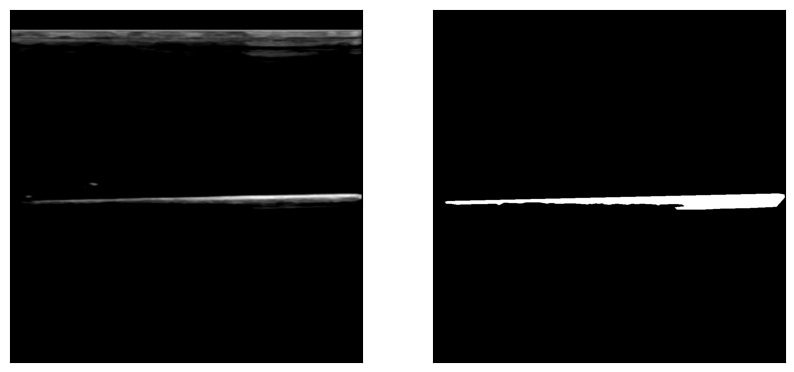

In [19]:
for image_dir, annotation_dir in zip(images_dict, annotation_dict):
    for image_name, annotation_name in zip(images_dict[image_dir], annotation_dict[annotation_dir]):
        print(image_name, "----", annotation_name)
        im = cv2.imread(os.path.join("Img", image_dir, image_name), 0)
        ann_path = os.path.join('Img', annotation_dir, annotation_name)
        shape_dicts = get_poly(ann_path)
        print(shape_dicts)
        im_binary = create_binary_masks(im, shape_dicts)
        plot_pair([im, im_binary], gray=True)
        plt.show()
        break
    break
# if im is None:
#     print("Error: Image not found or could not be loaded.")
# else:
#     # Display the image
#     cv2.imshow("Image Window", im)

#     # Wait for a key press and then close the image window
#     cv2.waitKey(0)  # Wait indefinitely until a key is pressed
#     cv2.destroyAllWindows()  # Close all OpenCV windows

In [17]:
# path = 
ann_path = os.path.join("Img", 'wire_images_video_1_annotated', 'wire1_ultrasound_watertank.json')
shape_dict = get_poly(ann_path)
print(shape_dict)
for shape in shape_dict:
    print(1)


[{'label': 'wire', 'points': [[1019.7368421052631, 538.421052631579], [1002.8947368421052, 535.0], [42.85106382978721, 557.0354609929078], [34.58543833580984, 559.8454680534918], [38.44873699851415, 564.0059435364042], [51.6260162601626, 564.6341463414634], [69.71544715447155, 567.8861788617886], [87.8048780487805, 566.0569105691058], [182.38993710691824, 564.4654088050314], [191.50943396226415, 568.2389937106918], [205.34591194968553, 561.6352201257862], [257.2327044025157, 563.5220125786163], [269.05128205128204, 560.0769230769231], [309.4358974358974, 560.2371794871796], [326.410480349345, 563.528384279476], [331.2169312169312, 564.8148148148148], [338.0952380952381, 562.037037037037], [350.0, 562.037037037037], [354.10052910052906, 564.0211640211639], [407.01058201058197, 563.3597883597884], [449.86772486772486, 566.2698412698412], [453.3068783068783, 564.2857142857142], [460.1818181818182, 565.8181818181819], [472.0, 563.8181818181819], [479.6864244741874, 564.7724665391969], [491

# Next Head